<a href="https://colab.research.google.com/github/konschak/WebscrappingAP/blob/main/Relatorio_apartamentos_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Limpeza dos dados

***
# <font color=Blue size=8>ANÁLISE DE DADOS DE APARTAMENTO</font>
***

# <font color=Blue>1 INTRODUÇÃO AOS DADOS</font>
***

### Dataset coletado através de webscrapping do site chaves na mão

O portal Chaves na Mão destaca-se como uma plataforma especializada na veiculação de anúncios imobiliários, abrangendo tanto empreendimentos na planta quanto unidades disponíveis para revenda. Os dados pertinentes foram extraídos por meio da técnica de web scraping, utilizando a biblioteca **Beautiful Soup** do Python.

Nessa coleta, o foco recaiu exclusivamente sobre apartamentos disponíveis para venda na região de Curitiba. Os elementos essenciais compilados contém informações importantes para potenciais compradores, incluindo o preço do imóvel, área em metros quadrados, quantidade de quartos e banheiros, número de vagas na garagem, além do endereço preciso. Para facilitar o acesso e análise detalhada, também foram capturados os links diretos para cada anúncio específico.

Este processo refinado de extração de dados visa proporcionar aos usuários uma visão abrangente e simplificada das opções de apartamentos à venda em Curitiba, consolidando informações valiosas para uma decisão informada e assertiva.

### Fonte dos Dados

https://www.chavesnamao.com.br/apartamentos-a-venda/pr-curitiba/?utm_source=google&utm_medium=conversao_venda&utm_campaign=conversao_venda_pr_cwb&utm_content=&gclid=Cj0KCQjw5f2lBhCkARIsAHeTvlgjJp5ARf3TRrjw_2-ALBhu4JcJo0MeJibemBCcMosjALMJrUBzFUkaArTHEALw_wcB

### Código de coleta dos dados

https://github.com/konschak/WebscrappingAP/blob/main/WebScrappingAP-231201.ipynb



# <font color=Blue>2 IMPORTANDO BIBLIOTECAS E LIMPANDO O DATASET</font>
***

### Importando Biblioteca



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import seaborn as sns
import matplotlib.pyplot as plt

### Importando CSV




In [ ]:
dados = pd.read_csv('Apartamentos0212.csv', sep=';', index_col=0)
dados.tail(5)

,preco,metros_quadrados,num_quartos,num_banheiro,num_garagem,endereco,link
5852,R$ 2.924.090,321,3,2,4,Orleans,https://www.chavesnamao.com.br/imovel/apartame...
5853,R$ 3.234.456,321,4,5,3,Água Verde,https://www.chavesnamao.com.br/imovel/cobertur...
5854,R$ 3.600.000,321,4,3,4,Batel,https://www.chavesnamao.com.br/imovel/cobertur...
5855,R$ 1.980.000,320,4,4,2,Batel,https://www.chavesnamao.com.br/imovel/apartame...
5856,R$ 1.100.000,320,3,5,1,Centro,https://www.chavesnamao.com.br/imovel/apartame...


### Tratando a coluna **preco** e convertendo Dtype object para Float

In [ ]:
dados.preco = dados.preco.str.replace('R$ ','',  regex=False)
dados.preco = dados.preco.str.replace('.','')
dados.preco = dados.preco.str.replace('Confira','0')
dados.preco = dados.preco.str.replace('A partir de','0')
dados.sort_values(by=['preco']).preco.unique()


<ipython-input-194-5531630f5a3c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados.preco = dados.preco.str.replace('.','')


array(['0', '1006244', '100800', ..., '997258', '998000', '999990'],
      dtype=object)

In [ ]:
dados.preco = dados.preco.astype(float)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5857 entries, 0 to 5856
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   preco             5857 non-null   float64
 1   metros_quadrados  5857 non-null   object 
 2   num_quartos       5857 non-null   object 
 3   num_banheiro      5857 non-null   object 
 4   num_garagem       5857 non-null   int64  
 5   endereco          5857 non-null   object 
 6   link              5857 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 366.1+ KB


### Tratando a coluna **metros_quadrados** e convertendo Dtype object para Float

In [ ]:
dados.metros_quadrados = dados.metros_quadrados.str.replace('.','' )
dados.metros_quadrados = dados.metros_quadrados.str.replace('--','0')

metro_split = dados.metros_quadrados
n = [metros_menor.split()[0] for metros_menor in metro_split]
dados.metros_quadrados = n
dados.sort_values(by=['metros_quadrados'], ascending=False).metros_quadrados.unique()


<ipython-input-196-353cc757a92a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados.metros_quadrados = dados.metros_quadrados.str.replace('.','' )


array(['99', '9879', '9864', '98120', '98', '9772', '9724', '97', '9636',
       '96', '9552', '9544', '95', '9443', '9439', '9434', '94320',
       '9413', '94', '9396', '9345', '93', '92', '91', '9076', '9018',
       '900', '90', '9', '8996', '8951', '8914', '89107', '89', '8836',
       '88220', '88', '87660', '874', '872', '87', '86000', '86', '8537',
       '85320', '851', '85', '8462', '845', '842', '84', '83780', '836',
       '83', '8276', '822', '821', '82', '8101', '81', '808', '805',
       '804', '80', '792', '79170', '791', '790', '79', '7822', '7818',
       '78', '779', '7773', '7764', '7745', '7709', '77', '76', '7517',
       '751', '75', '749', '743', '742', '74', '7335', '7320', '732',
       '73', '729', '728', '7277', '725', '72', '7175', '7162', '715',
       '71', '707', '706', '701', '700', '70', '7', '695', '693', '69',
       '687', '683', '6826', '682', '68', '6798', '6772', '6738', '67',
       '6640', '664', '66390', '663', '6618', '66137', '66020', '66',


In [ ]:
dados.metros_quadrados = dados.metros_quadrados.astype(float)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5857 entries, 0 to 5856
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   preco             5857 non-null   float64
 1   metros_quadrados  5857 non-null   float64
 2   num_quartos       5857 non-null   object 
 3   num_banheiro      5857 non-null   object 
 4   num_garagem       5857 non-null   int64  
 5   endereco          5857 non-null   object 
 6   link              5857 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 366.1+ KB


### Ajustando erro de unidade na coluna **metros quadrados**

In [ ]:
dados.metros_quadrados[65]

86000.0

In [ ]:
dic_metros_ajustado = {'metros_quadrados':[]}
for metros_quadrados in dados.metros_quadrados:
  if metros_quadrados >= 20000:
    dic_metros_ajustado['metros_quadrados'].append(metros_quadrados/1000)
  elif metros_quadrados >= 1000:
    dic_metros_ajustado['metros_quadrados'].append(metros_quadrados/100)
  else:
    dic_metros_ajustado['metros_quadrados'].append(metros_quadrados)


In [ ]:
dados.metros_quadrados  = pd.DataFrame(dic_metros_ajustado)
dados.metros_quadrados.head()

0   45
1   48
2   96
3   92
4   78
Name: metros_quadrados, dtype: float64

In [ ]:
dados.metros_quadrados[65]

86.0

### Tratando a coluna **num_quartos** e convertendo Dtype object para Integer

In [ ]:
dados.sort_values(by=['num_quartos']).num_quartos.unique()

array(['0', '1 ', '1  Banheiro', '1  Garagem', '1 a 1 ', '1 a 2 ',
       '1 a 3 ', '10 ', '10  Banheiros', '18 ', '2 ', '2  Banheiros',
       '2 a 2 ', '2 a 3 ', '2 a 4 ', '3 ', '3 a 3 ', '3 a 4 ', '4 ', '5 ',
       '6 ', '7 '], dtype=object)

In [ ]:
quarto_split = dados.num_quartos
n = [quarto_menor.split()[0] for quarto_menor in quarto_split]
dados.num_quartos = n
dados.sort_values(by=['num_quartos']).num_quartos.unique()

array(['0', '1', '10', '18', '2', '3', '4', '5', '6', '7'], dtype=object)

In [ ]:
dados.num_quartos = dados.num_quartos.astype(int)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5857 entries, 0 to 5856
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   preco             5857 non-null   float64
 1   metros_quadrados  5857 non-null   float64
 2   num_quartos       5857 non-null   int64  
 3   num_banheiro      5857 non-null   object 
 4   num_garagem       5857 non-null   int64  
 5   endereco          5857 non-null   object 
 6   link              5857 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 495.1+ KB


### Tratando a coluna **num_banheiro** e convertendo Dtype object para Integer

In [ ]:
banheiro_split = dados.num_banheiro
n = [banheiro_menor.split()[0] for banheiro_menor in banheiro_split]
dados.num_banheiro = n
dados.sort_values(by=['num_banheiro']).num_banheiro.unique()

array(['0', '1', '18', '2', '21', '3', '30', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [ ]:
dados.num_banheiro = dados.num_banheiro.astype(int)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5857 entries, 0 to 5856
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   preco             5857 non-null   float64
 1   metros_quadrados  5857 non-null   float64
 2   num_quartos       5857 non-null   int64  
 3   num_banheiro      5857 non-null   int64  
 4   num_garagem       5857 non-null   int64  
 5   endereco          5857 non-null   object 
 6   link              5857 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 495.1+ KB


### Limpeza de dados nulos ou não preenchidos

In [ ]:
# Removendo duplicatas
dados.drop_duplicates(inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5857 entries, 0 to 5856
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   preco             5857 non-null   float64
 1   metros_quadrados  5857 non-null   float64
 2   num_quartos       5857 non-null   int64  
 3   num_banheiro      5857 non-null   int64  
 4   num_garagem       5857 non-null   int64  
 5   endereco          5857 non-null   object 
 6   link              5857 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 366.1+ KB


In [ ]:
 # Removendo linhas sem descrição de preço
 preco_zerado =  dados.loc[(dados['preco'] == 0)]
 preco_zerado.index

Int64Index([  13,   35,   48,   88,  260,  269,  305,  330,  635,  888, 4585,
            4920, 5408, 5414, 5418, 5475, 5476, 5567, 5568],
           dtype='int64')

In [ ]:
dados.drop(preco_zerado.index, inplace=True)

In [ ]:
# Removendo linhas sem descrição de metros quadrados
metros_zerado =  dados.loc[(dados['metros_quadrados'] == 0)]
dados.drop(metros_zerado.index, inplace=True)

In [ ]:
# Removendo preços inferiores a 10000
Preco_inferiores =  dados.loc[(dados['preco'] <= 10000)]
dados.drop(Preco_inferiores.index, inplace=True)

,preco,metros_quadrados,num_quartos,num_banheiro,num_garagem,endereco,link,Preco_por_metro_quadrado


In [ ]:
# Removendo preços inferiores a 10000
Preco_inferiores =  dados.loc[(dados['preco'] <= 10000)]
dados.drop(Preco_inferiores.index, inplace=True)

### <font color='red'>Observação</font>

> Os seguintes tratamentos foram realizados nos dados originais:
> 1. No tratamento dos dados coletados, foi adotada a estratégia de selecionar o menor valor em casos de múltiplas entradas para características como área, número de quartos, banheiros e vagas na garagem;
> 2. Foram descartadas as entradas em que o preço não estava preenchido ou apresentava um valor inferior a R$ 10.000,00;
> 3. Todos os valores que originalmente excediam 20.000 foram divididos por 1.000, ajustando a unidade para facilitar a compreensão. Similarmente, aqueles que ultrapassavam 1.000 foram divididos por 100 para adequar a unidade

# <font color=Blue>3 ANÁLISE DOS DADOS</font>
***

### Criando a coluna **preco/metro quadrado**


In [ ]:
pd.set_option('float_format', '{:.3f}'.format)
dados['Preco_por_metro_quadrado'] = dados.preco/dados.metros_quadrados
dados['Preco_por_metro_quadrado'].head()

0   6400.000
1   6164.562
2   5416.667
3   9728.261
4   7051.282
Name: Preco_por_metro_quadrado, dtype: float64

### Criando um Dataframe média de preços/m² agrupado por bairro


In [ ]:
preco_metro_quadrado_outlier = dados.loc[(dados['Preco_por_metro_quadrado'] >= 30000)]
dados.drop(preco_metro_quadrado_outlier.index, inplace=True)

In [ ]:
from pandas.core.indexes.api import Index
pd.set_option('float_format', '{:.0f}'.format,
              'display.max_rows',
              None)

dic_contagem = {'endereco':[], 'contagem':[], 'media_mquad':[]}
contagem = dados.groupby('endereco').count()
bairros = contagem.index.values
contagem_valores = contagem.preco.values
media_mquad = dados.groupby('endereco').mean()
media_mquad = media_mquad['Preco_por_metro_quadrado']
media_mquad

<ipython-input-224-53c47e0b179e>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_mquad = dados.groupby('endereco').mean()


endereco
Abranches              5645
Ahú                   11438
Alto Boqueirão         3855
Alto da Glória        12471
Alto da Rua XV         9997
Atuba                  4375
Augusta                4241
Bacacheri             10963
Bairro Alto            5204
Barreirinha            4515
Batel                 14669
Bigorrilho            15699
Boa Vista              7518
Bom Retiro             9863
Boqueirão              4903
Cabral                14247
Cachoeira              3320
Cajuru                 6523
Campina do Siqueira   17452
Campo Comprido         7328
Campo de Santana       3613
Capão Raso             6421
Capão da Imbuia        7261
Cascatinha            10763
Centro                 9889
Centro Cívico         10248
Cidade Industrial      4715
Cristo Rei             9019
Ecoville              14666
Fanny                  7202
Fazendinha             4318
Ganchinho              3384
Guabirotuba            8836
Guaíra                 6158
Hauer                  6830
Hugo Lange 

### Criando DataFrame para contagem e media por metro quadrado por bairro

In [ ]:
pd.set_option('float_format', '{:.0f}'.format)
df_bairros = pd.DataFrame({'contagem':contagem_valores,'media_mquad':media_mquad}, index=bairros)
df_bairros.sort_values(by=['media_mquad'], ascending=False, inplace=True)
df_bairros

NameError: ignored

### Descobrindo a média por metro quadrado dos imóveis em Curitiba

In [ ]:
media_curitiba = media_mquad.mean()
media_curitiba

8298.597242563459

### Gráfico de barras para as médias de **media_mquad** por bairro

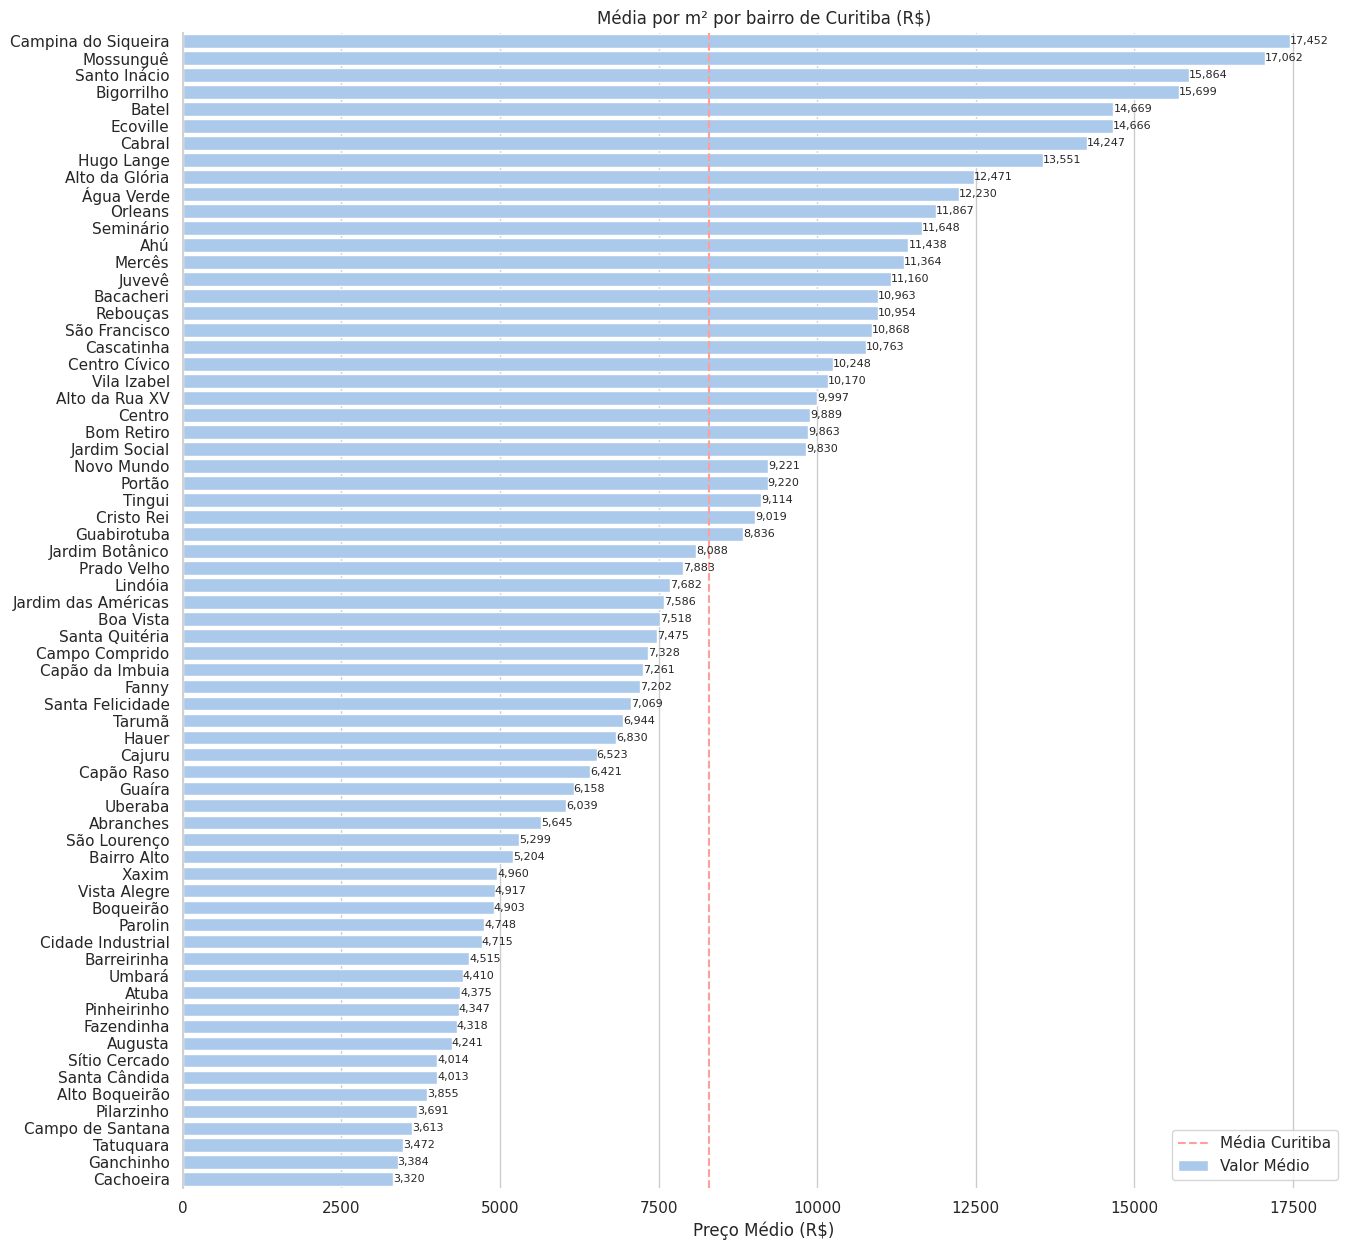

In [ ]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 15))


sns.set_color_codes("pastel")
sns.barplot(x="media_mquad", y=df_bairros.index, data=df_bairros,
            label="Valor Médio", color="b")
ax.axvline(x=media_curitiba, color='r', linestyle='--', label='Média Curitiba')

ax.legend(ncol=1, loc="lower right", frameon=True)
ax.bar_label(ax.containers[0], fontsize=8, fmt='{:,.0f}')

ax.set_title('Média por m² por bairro de Curitiba (R$)')
ax.set(ylabel="",
       xlabel="Preço Médio (R$)")
sns.despine( bottom=True)

plt.savefig('media_bairros.png' )

In [ ]:
df_bairros.query('contagem <= 5')

,contagem,media_mquad
Cascatinha,3,10763
Jardim Social,2,9830
Jardim das Américas,4,7586
Tarumã,2,6944
Abranches,2,5645
São Lourenço,1,5299
Vista Alegre,1,4917


### <font color='red'>Observação sobre o gráfico de barras</font>

> Os seguintes tratamentos foram realizados:
> 1. Preco_por_metro_quadrado acima de 30.000 foram considerados outliers;
> 2. Existem bairros que não contém amostragem o suficiente para termos uma média de preço;
> 3. Todos os valores que originalmente excediam 20.000 foram divididos por 1.000, ajustando a unidade para facilitar a compreensão. Similarmente, aqueles que ultrapassavam 1.000 foram divididos por 100 para adequar a unidade

In [ ]:
dic_contagem['endereco'].append(dados.groupby('endereco'))

print(dic_contagem)

{'endereco': [<pandas.core.groupby.generic.DataFrameGroupBy object at 0x7e4ffe070580>], 'contagem': [], 'media_mquad': []}


In [ ]:
dados_curitiba = pd.read_csv('2023-11-07_Sigmu_-_GTMBAIBAIRRO_-_Base_de_Dados.csv', sep=';',encoding='latin-1', index_col=0)
dados_curitiba = dados_curitiba.set_index('NME_BAIRRO')
dados_curitiba.append({'NME_BAIRRO': 'Ecoville',
                       'Regional': 'Santa Felicidade'},
                      ignore_index=True)

dados_curitiba

<ipython-input-233-af9c710623ad>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados_curitiba.append({'NME_BAIRRO': 'Ecoville',


,Regional
NME_BAIRRO,
Centro,Matriz
São Francisco,Matriz
Centro Cívico,Matriz
Alto da Glória,Matriz
Alto da Rua XV,Matriz
Cristo Rei,Matriz
Jardim Botânico,Matriz
Rebouças,Matriz
Água Verde,Portão


In [ ]:
dados = dados.join(dados_curitiba,  on="endereco")

<Axes: xlabel='Preco_por_metro_quadrado', ylabel='Regional'>

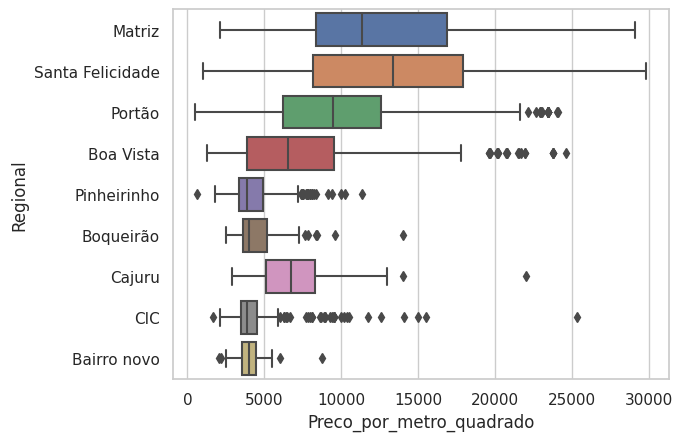

In [ ]:
sns.boxplot(data=dados, x="Preco_por_metro_quadrado", y="Regional")


In [ ]:
dados.head()

,preco,metros_quadrados,num_quartos,num_banheiro,num_garagem,endereco,link,Preco_por_metro_quadrado,Regional
0,288000,45,2,1,1,Prado Velho,https://www.chavesnamao.com.br/lancamento/lanc...,6400,Matriz
1,295899,48,2,0,0,Ecoville,https://www.chavesnamao.com.br/imovel/apartame...,6165,Santa Felicidade
2,520000,96,3,2,1,Centro,https://www.chavesnamao.com.br/imovel/apartame...,5417,Matriz
3,895000,92,3,2,2,Água Verde,https://www.chavesnamao.com.br/imovel/apartame...,9728,Portão
4,550000,78,3,2,1,Cabral,https://www.chavesnamao.com.br/imovel/apartame...,7051,Matriz


In [ ]:
dados_acima_30000 = dados.loc[(dados['Preco_por_metro_quadrado'] >= 30000) |
                              (dados['Preco_por_metro_quadrado'] <= 800) |
                              (dados['preco'] >= 1500000)]

dados_acima_30000

,preco,metros_quadrados,num_quartos,num_banheiro,num_garagem,endereco,link,Preco_por_metro_quadrado,Regional
16,3170000,178,3,4,2,Alto da Glória,https://www.chavesnamao.com.br/imovel/apartame...,17809,Matriz
28,3250000,372,4,6,4,Ecoville,https://www.chavesnamao.com.br/imovel/apartame...,8737,Santa Felicidade
31,2100000,220,4,5,3,Batel,https://www.chavesnamao.com.br/imovel/apartame...,9545,Matriz
49,1587420,275,3,4,2,Cabral,https://www.chavesnamao.com.br/imovel/apartame...,5772,Matriz
68,2445255,193,0,0,0,Orleans,https://www.chavesnamao.com.br/imovel/apartame...,12670,Santa Felicidade
71,1580000,166,5,5,2,Cidade Industrial,https://www.chavesnamao.com.br/imovel/apartame...,9518,CIC
77,3500000,420,4,5,3,Batel,https://www.chavesnamao.com.br/imovel/apartame...,8333,Matriz
103,1553534,155,3,4,3,Ahú,https://www.chavesnamao.com.br/imovel/apartame...,10023,Matriz
107,1590000,149,3,3,3,Cristo Rei,https://www.chavesnamao.com.br/imovel/apartame...,10671,Matriz
108,1645645,166,4,5,2,Ecoville,https://www.chavesnamao.com.br/imovel/apartame...,9914,Santa Felicidade


In [ ]:
locc = dados.loc[(dados['Regional'] == 'Santa Felicidade') &
                              (dados['Regional'] == 'Santa Felicidade') &
                              (dados['preco'] <= 200000)]

locc

,preco,metros_quadrados,num_quartos,num_banheiro,num_garagem,endereco,link,Preco_por_metro_quadrado,Regional
36,190000,59,2,1,1,Campo Comprido,https://www.chavesnamao.com.br/imovel/apartame...,3220,Santa Felicidade
448,199000,50,3,1,1,Campo Comprido,https://www.chavesnamao.com.br/imovel/apartame...,3980,Santa Felicidade
458,148000,46,2,1,1,Campo Comprido,https://www.chavesnamao.com.br/imovel/apartame...,3217,Santa Felicidade
465,149900,45,2,1,1,Campo Comprido,https://www.chavesnamao.com.br/imovel/apartame...,3331,Santa Felicidade
484,189990,56,3,1,1,Campo Comprido,https://www.chavesnamao.com.br/imovel/apartame...,3393,Santa Felicidade
487,175000,46,2,1,1,Campo Comprido,https://www.chavesnamao.com.br/imovel/apartame...,3804,Santa Felicidade
755,190000,58,3,1,1,Campo Comprido,https://www.chavesnamao.com.br/imovel/apartame...,3276,Santa Felicidade
765,180000,49,3,1,1,Campo Comprido,https://www.chavesnamao.com.br/imovel/apartame...,3673,Santa Felicidade
877,145000,100,2,1,0,Campo Comprido,https://www.chavesnamao.com.br/imovel/apartame...,1450,Santa Felicidade
970,180000,51,2,1,1,Campo Comprido,https://www.chavesnamao.com.br/imovel/apartame...,3529,Santa Felicidade


In [ ]:
dados.drop(axis=0, index=dados_acima_30000.index, inplace = True)

<Axes: xlabel='Preco_por_metro_quadrado', ylabel='Regional'>

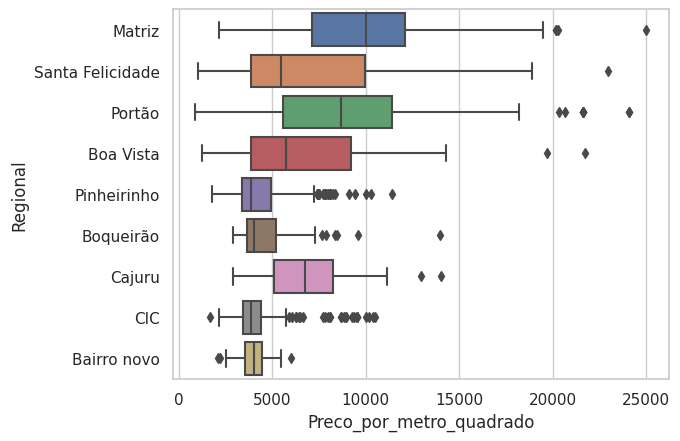

In [ ]:
sns.boxplot(data=dados, x="Preco_por_metro_quadrado", y="Regional")

In [ ]:
ordenar_valores = dados.groupby('Regional').mean().sort_values(by= 'Preco_por_metro_quadrado')
ordenar_valores= ordenar_valores.sort_values(by='Preco_por_metro_quadrado')

<ipython-input-241-de82bde7829a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ordenar_valores = dados.groupby('Regional').mean().sort_values(by= 'Preco_por_metro_quadrado')


<Axes: xlabel='Preco_por_metro_quadrado', ylabel='Regional'>

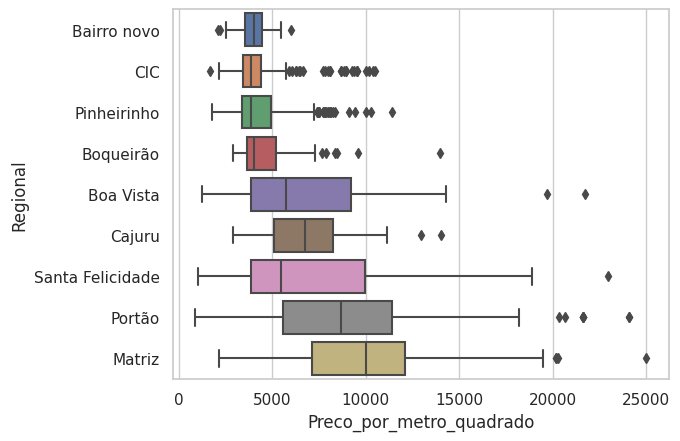

In [ ]:
sns.boxplot(data=dados,
            x="Preco_por_metro_quadrado",
            y="Regional",
            order = ordenar_valores.index)

#possivel identificar que quanto maior a media maior a dispersao dos dados

<Axes: xlabel='preco', ylabel='Preco_por_metro_quadrado'>

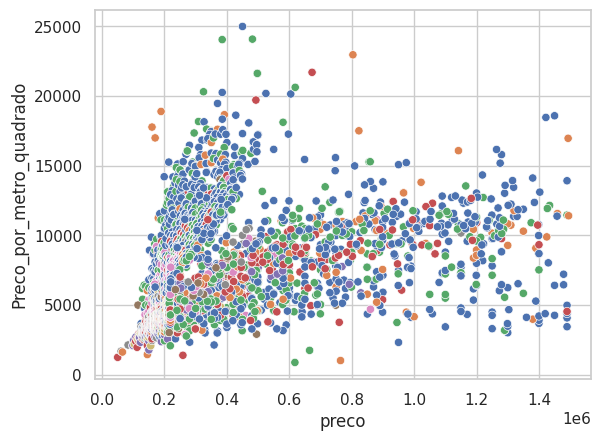

In [ ]:

sns.scatterplot(data=dados, x="preco", y="Preco_por_metro_quadrado", hue="Regional", legend=False)

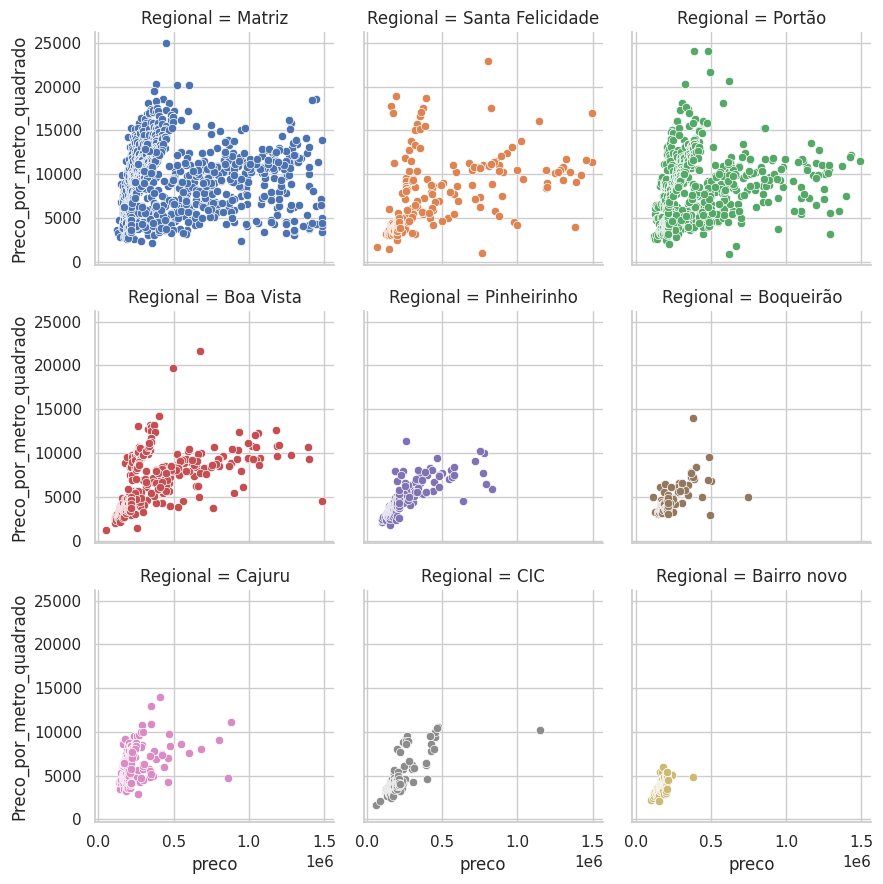

In [ ]:
regional_scatter = sns.FacetGrid(dados, col="Regional",col_wrap=3, hue="Regional")
regional_scatter.map_dataframe(sns.scatterplot, x="preco", y="Preco_por_metro_quadrado")


In [ ]:
#from google.colab import drive
#drive.mount ('/drive')
#preco_abaixo_de_5000.to_csv('/drive/My Drive/Colab Notebooks/preco_abaixo_de_5000_0411.csv', encoding='utf-8', sep=';')

In [ ]:
preco_abaixo_de_5000 =  dados.loc[(dados['Preco_por_metro_quadrado'] <= 5000) & (dados['Preco_por_metro_quadrado'] >= 1000) & (dados['metros_quadrados'] > 35) & (dados['preco'] <= 300000)]
preco_abaixo_de_5000

,preco,metros_quadrados,num_quartos,num_banheiro,num_garagem,endereco,link,Preco_por_metro_quadrado
11,285000,58,3,1,0,Santa Cândida,https://www.chavesnamao.com.br/imovel/apartame...,4914
36,190000,59,2,1,1,Campo Comprido,https://www.chavesnamao.com.br/imovel/apartame...,3220
40,210000,49,2,1,1,Santa Cândida,https://www.chavesnamao.com.br/imovel/apartame...,4286
53,199900,45,2,1,1,Boa Vista,https://www.chavesnamao.com.br/imovel/apartame...,4442
64,215000,74,0,0,0,Tingui,https://www.chavesnamao.com.br/imovel/apartame...,2905
78,227000,58,3,1,1,Santa Cândida,https://www.chavesnamao.com.br/imovel/apartame...,3914
79,160000,52,2,1,1,Campo de Santana,https://www.chavesnamao.com.br/imovel/apartame...,3077
82,235000,91,2,1,0,Centro,https://www.chavesnamao.com.br/imovel/apartame...,2582
83,230000,46,2,1,1,Campo Comprido,https://www.chavesnamao.com.br/imovel/apartame...,5000
89,275000,56,2,1,1,Capão Raso,https://www.chavesnamao.com.br/lancamento/lanc...,4911
